In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
import numpy as np

In [9]:
A, B = .5,.1
t = np.linspace(0,30)

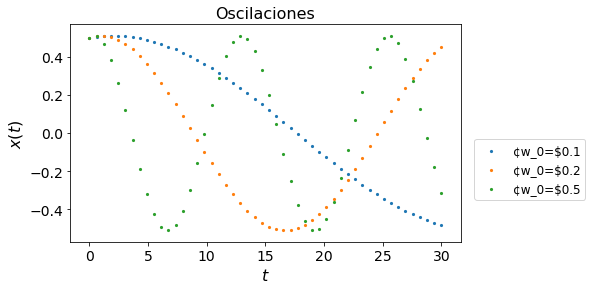

In [16]:
frecuencias = np.array([.1, .2, .5])   # Vector de diferentes frecuencias
plt.figure(figsize = (7, 4))                # Ventana de gráfica con tamaño

# Graficamos para cada frecuencia
for w0 in frecuencias:
    x = A*np.cos(w0*t)+B*np.sin(w0*t)
    plt.scatter(t, x, s= 10, lw= 0, label = "¢w_0=$%s" %w0)
plt.xlabel('$t$', fontsize = 16)            # Etiqueta eje x
plt.ylabel('$x(t)$', fontsize = 16)         # Etiqueta eje y
plt.title('Oscilaciones', fontsize = 16)    # Título de la gráfica
plt.legend(bbox_to_anchor=(1.02,0.5), prop={"size":12})
plt.show()

In [17]:
from ipywidgets import *

In [18]:
def masa_resorte(t = 0):
    A, B, w0 = .5, .1, .5                            # Parámetros
    x = A*np.cos(w0*t)+B*np.sin(w0*t)                # Función de posición
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, [0],  'ko', ms = 10)
    ax.set_xlim(xmin = -0.6, xmax = .6)
    ax.axvline(x=0, color = 'r')
    ax.axhline(y=0, color = 'grey', lw = 1)
    fig.canvas.draw()

interact(masa_resorte, t = (0, 50,.01));

A Jupyter Widget

In [21]:
# Podemos definir una función que nos entregue theta dados los parámetros y el tiempo
def theta_t(a, b, g, l, t):
    omega_0 = np.sqrt(g/l)
    return a * np.cos(omega_0 * t) + b * np.sin(omega_0 * t) 

In [22]:
# Hacemos un gráfico interactivo del péndulo
def pendulo_simple(t = 0):
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(1, 1, 1)
    x = 2 * np.sin(theta_t(.4, .6, 9.8, 2, t))
    y =  - 2 * np.cos(theta_t(.4, .6, 9.8, 2, t))
    ax.plot(x, y, 'ko', ms = 10)
    ax.plot([0], [0], 'rD')
    ax.plot([0, x ], [0, y], 'k-', lw = 1)
    ax.set_xlim(xmin = -2.2, xmax = 2.2)
    ax.set_ylim(ymin = -2.2, ymax = .2)
    fig.canvas.draw()
    
interact_manual(pendulo_simple, t = (0, 10,.01));

A Jupyter Widget

### Actividad

In [19]:
# Solución: 
def theta_t(theta_0,dtheta_0,g,l,t):
    omega_0 = np.sqrt(g/l)
    return theta_0 * np.cos(omega_0 * t) + dtheta_0/omega_0 * np.sin(omega_0 * t) 

In [20]:
def pendulo_simple(t = 0):
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(1, 1, 1)
    x = 2 * np.sin(theta_t(0.1, 0, 9.8, 2, t))
    y =  - 2 * np.cos(theta_t(0.1, 0, 9.8, 2, t))
    ax.plot(x, y, 'ko', ms = 10)
    ax.plot([0], [0], 'rD')
    ax.plot([0, x ], [0, y], 'k-', lw = 1)
    ax.set_xlim(xmin = -2.2, xmax = 2.2)
    ax.set_ylim(ymin = -2.2, ymax = .2)
    fig.canvas.draw()
interact_manual(pendulo_simple, t = (0, 10,.01));

A Jupyter Widget

## Sistema masa-resorte

In [23]:
k = 3  #constante elástica [N]/[m] 
m = 1 # [kg]
omega_0 = np.sqrt(k/m)
x_0 = .5 # Posicion inicial
dx_0 = .1 #Velocidad inicial

In [24]:
t = np.linspace(0, 15, 300)# tiempo 

In [27]:
x_t = x_0 *np.cos(omega_0 *t) + (dx_0/omega_0) * np.sin(omega_0 *t) # posicion
dx_t = -omega_0 * x_0 * np.sin(omega_0 * t) + dx_0 * np.cos(omega_0 * t) # velocidad


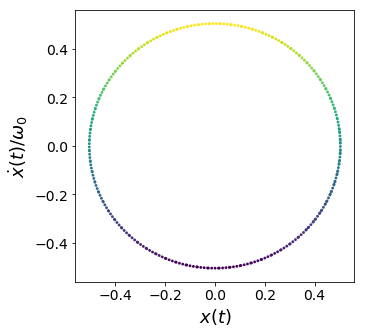

In [28]:
plt.figure(figsize = (5, 5))
plt.scatter(x_t, dx_t/omega_0, cmap = 'viridis', c = dx_t, s = 8, lw = 0)
plt.xlabel('$x(t)$', fontsize = 18)
plt.ylabel('$\dot{x}(t)/\omega_0$', fontsize = 18)
plt.show()

## Multiples condiciones

In [29]:
k = 3  #constante elástica [N]/[m] 
m = 1 # [kg]
omega_0 = np.sqrt(k/m)

In [30]:
t = np.linspace(0, 50, 50)

In [31]:
x_0s = np.array([.7, .5, .25, .1])
dx_0s = np.array([.2, .1, .05, .01])
cmaps = np.array(['viridis', 'inferno', 'magma', 'plasma'])

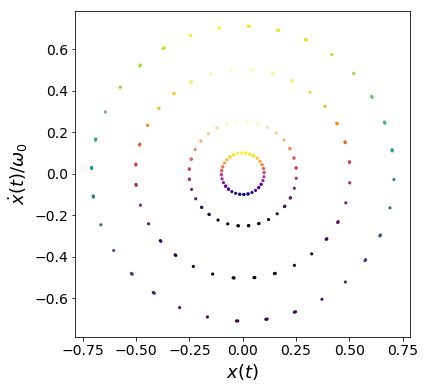

In [32]:
plt.figure(figsize = (6, 6))
for indx, x_0 in enumerate(x_0s):
    x_t = x_0 *np.cos(omega_0 *t) + (dx_0s[indx]/omega_0) * np.sin(omega_0 *t)
    dx_t = -omega_0 * x_0 * np.sin(omega_0 * t) + dx_0s[indx] * np.cos(omega_0 * t)
    plt.scatter(x_t,  dx_t/omega_0, cmap = cmaps[indx], 
                c = dx_t, s = 10, 
                lw = 0)
    plt.xlabel('$x(t)$', fontsize = 18)
    plt.ylabel('$\dot{x}(t)/\omega_0$', fontsize = 18)
    #plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

## Actividad... considerar un pendulo simple en diferentes planetas, y graficar su espacio fase.

In [39]:
lgrave = np.array([2.94, 2.8, 8.9, 9.8, 3.7, 22.9, 9.1, 7.8, 11, .62, 1.6])
labels = np.array(["Sol", "Mercurio", "Venus", "Tierra", "Marte" , "Jupiter", "Saturno", "Urano", "Neptuno", "Pluton", "Luna"])
#Sol, Mercurio, venur, tierra, marte, jupiter, saturno, urano, neptuno, pluton, luna

In [49]:
def theta_t(theta_0, dtheta, g, l, t):
    omega_0 = np.sqrt(g/l)
    return theta * np.cos(omega_0 * t) + dtheta_0/omega_0 * np.sin(omega_0 * t) 


In [57]:
theta_0 =.1
dtheta_0=.2
l=2

In [60]:
plt.figure(figsize =(4,4))
for indx, g in enumerate(lgrave):
    x = 2 * np.sin(theta_t(theta_0,dtheta_0,g,l,t))
    omega_0 = np.sqrt(g/l)
    dtheta_t = -omega_0 *theta_0*np.sin(omega_0*t)+ dtheta_0 * np.cos(omega_0*t)
    dx = 2 * np.cos(theta_t(theta_0,dtheta_0,g,l,t))*dtheta_t
    plt.scatter(x, dx/omega_0, s=5, label= labels[indx])
plt.legend(bbox_to_anchor=(1.05,.9), prop={"size": 10})
plt.show()


NameError: name 'theta' is not defined

In [ ]:
vgrave = [2.94, 2.8, 8.9, 9.8, 3.7, 22.9, 9.1, 7.8, 11, .62, 1.6]
#Sol, Mercurio, venur, tierra, marte, jupiter, saturno, urano, neptuno, pluton, luna